In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import seaborn as sns
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

In [ ]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [ ]:
print("tensorflow version: {}".format(tf. __version__))

tensorflow version: 2.8.0


In [ ]:
source_dir = '/content/drive/MyDrive/dataset1'

In [ ]:
#path into train and test images
train_images_dir = os.path.join(source_dir, 'images_prepped_train')
train_annotations_dir = os.path.join(source_dir, 'annotations_prepped_train')

In [ ]:
img_size = 128

train_images = []
test_images = []

train_annotations = []
test_annotations = []


for index in range (len(os.listdir(train_images_dir))):
    image = cv2.imread(os.path.join(train_images_dir, os.listdir(train_images_dir)[index]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255 # normalize
    
    annotation = cv2.imread(os.path.join(train_annotations_dir, os.listdir(train_annotations_dir)[index]), cv2.IMREAD_UNCHANGED)
#     annotation = cv2.cvtColor(annotation, cv2.IMREAD_UNCHANGED)
    
    image_resize = cv2.resize(image, (img_size, img_size))
    annotation_resize = cv2.resize(annotation, (img_size, img_size))
    
    train_images.append(image_resize)
    train_annotations.append(annotation_resize)

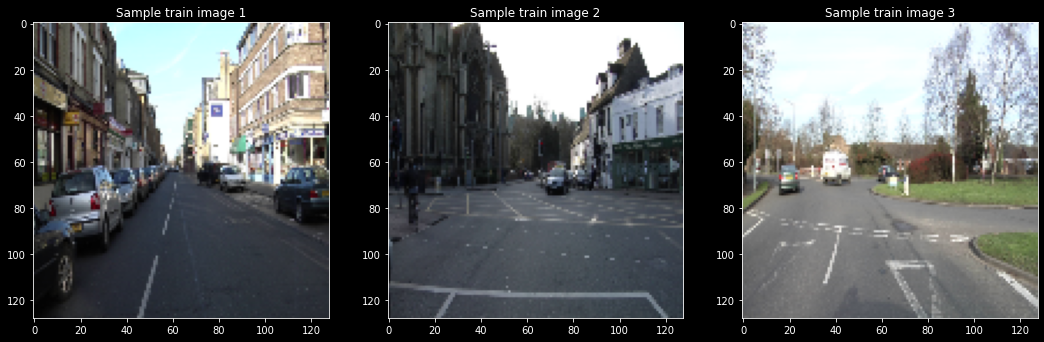

In [ ]:
#Plot sample of train images
fig = plt.figure(figsize = (18,10))

for index in range(3):
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Sample train image {}".format(index+1))
    ax.imshow(train_images[index], cmap='gray')

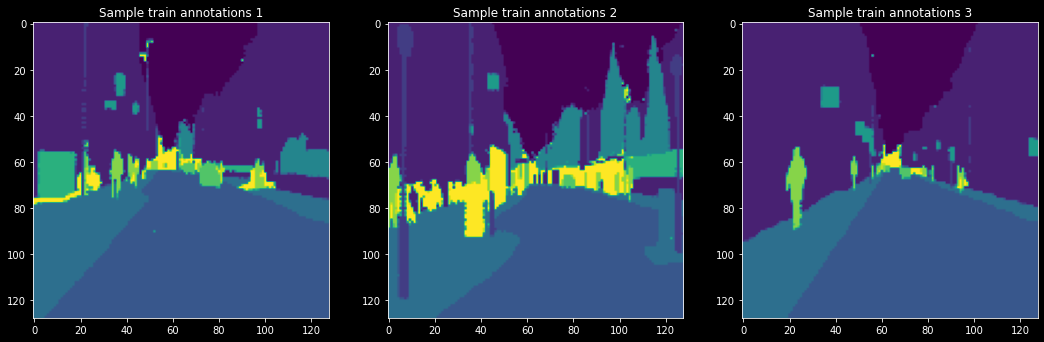

In [ ]:
#Plot sample of train annotations
fig = plt.figure(figsize = (18,10))


for index in range(3):
#     image = mpimg.imread(os.path.join(train_annotations_dir, os.listdir(train_annotations_dir)[index]))
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Sample train annotations {}".format(index+1))
    ax.imshow(train_annotations[index])

In [ ]:
print("There are {} images in train images".format(len(os.listdir(train_images_dir))))
print("\nThere are {} images in train annotations".format(len(os.listdir(train_annotations_dir))))

There are 367 images in train images

There are 367 images in train annotations


In [ ]:
print("shape of one sample image in train images dataset: {}".format(train_images[0].shape))
print("\nshape of one sample image in train annotations dataset: {}".format(train_annotations[0].shape))

shape of one sample image in train images dataset: (128, 128, 3)

shape of one sample image in train annotations dataset: (128, 128)


In [ ]:
train_images = np.array(train_images)
train_annotations = np.array(train_annotations)

In [ ]:
train_annotations = np.expand_dims(train_annotations, axis = 3)

In [ ]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(train_images, train_annotations, train_size = 0.65, test_size = 0.35, random_state = 1)

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train).squeeze()
y_test = np.array(y_test)

In [ ]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (238, 128, 128, 3)
y_train shape: (238, 128, 128)


In [ ]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (129, 128, 128, 3)
y_test shape: (129, 128, 128, 1)


In [ ]:
classes = np.unique(y_train)
num_class = len(classes)
print("classes in image: {} : \n {}".format(num_class, classes)) 

classes in image: 12 : 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
#One hot encoding label using to_categorical 

label_train = tf.keras.utils.to_categorical(y_train, num_class)
label_test = tf.keras.utils.to_categorical(y_test, num_class)

In [ ]:
print("image shape: {}".format(x_train.shape))
print("label shape: {}".format(label_train.shape))

image shape: (238, 128, 128, 3)
label shape: (238, 128, 128, 12)


In [ ]:
y_train[0].shape

(128, 128)

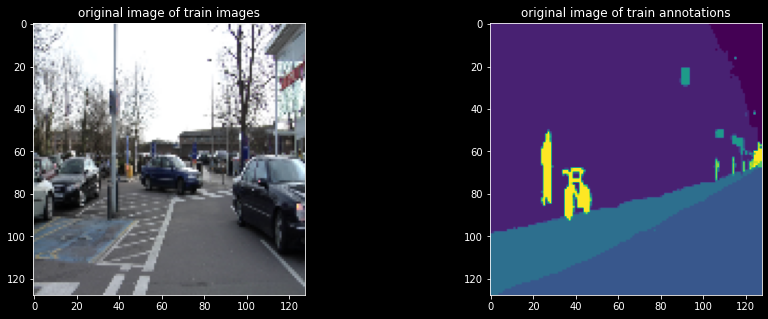

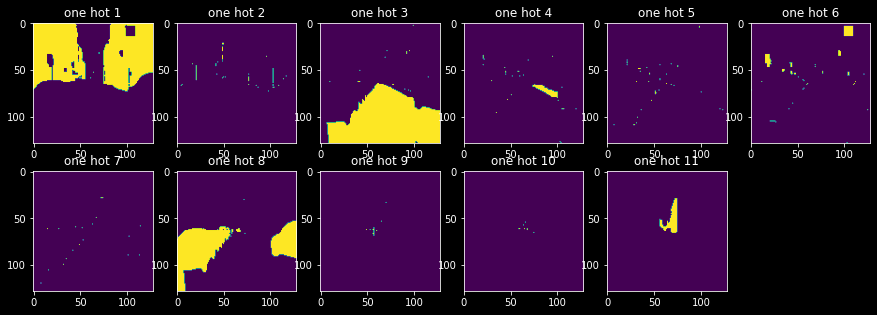

In [ ]:
#Plot one hot encoding
fig = plt.figure(figsize = (15,5))
fig2 = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title("original image of train images")
ax1.imshow(x_train[3], cmap='gray')

ax2.set_title("original image of train annotations")
ax2.imshow(y_train[3])

for index in range(1, 12):
    ax = fig2.add_subplot(2,6, index)
    ax.set_title("one hot {}".format(index))
    ax.imshow(label_train[0][:,:,index])

plt.show()

In [ ]:
height = x_train.shape[1]
width = x_train.shape[2]
channel = x_train.shape[3]

In [ ]:
#Unet model

inputs = tf.keras.Input((width,height,channel))

conv1 = Conv2D(64, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(inputs)
conv1 = Conv2D(64, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(conv1)
pool1 = MaxPooling2D(2,2)(conv1)

conv2 = Conv2D(128, 3, activation= 'relu', kernel_initializer='he_normal', padding = 'same')(pool1)
conv2 = Conv2D(128, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(conv2)
pool2 = MaxPooling2D(2,2)(conv2)

conv3 = Conv2D(256, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(pool2)
conv3 = Conv2D(256, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(conv3)
pool3 = MaxPooling2D(2,2)(conv3)

conv4 = Conv2D(512, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(pool3)
conv4 = Conv2D(512, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(conv4)
# dropout4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(2,2)(conv4)


conv5 = Conv2D(1024, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(pool4)
conv5 = Conv2D(1024, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(conv5)
dropout5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(UpSampling2D(size = (2,2))(dropout5))
merge6 = concatenate([conv4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', kernel_initializer='he_normal', padding = 'same')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu',kernel_initializer='he_normal', padding = 'same')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv8)
,
up9 = Conv2D(64, 2, activation = 'relu', kernel_initializer='he_normal', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu',kernel_initializer='he_normal', padding = 'same')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu',kernel_initializer='he_normal', padding = 'same')(conv9)

conv9 = Conv2D(64, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(conv9)
conv10 = Conv2D(12, 1, activation = 'softmax')(conv9)

model = tf.keras.Model(inputs,conv10)
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_106 (Conv2D)            (None, 128, 128, 64  1792        ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_107 (Conv2D)            (None, 128, 128, 64  36928       ['conv2d_106[0][0]']             
                                )                                                           

In [ ]:
history = model.fit(
    x_train, 
    label_train, 
    validation_data=(x_test, label_test), 
    epochs=60, 
    batch_size=24,
    )

Epoch 1/60
14/14 [==============================] - 510s 37s/step - loss: 183.9970 - accuracy: 0.2638 - val_loss: 1.9642 - val_accuracy: 0.3799
Epoch 2/60
14/14 [==============================] - 509s 37s/step - loss: 1.8872 - accuracy: 0.3724 - val_loss: 1.7084 - val_accuracy: 0.5148
Epoch 3/60
14/14 [==============================] - 510s 37s/step - loss: 1.9950 - accuracy: 0.3489 - val_loss: 1.9700 - val_accuracy: 0.3460
Epoch 4/60
14/14 [==============================] - 508s 37s/step - loss: 1.7697 - accuracy: 0.4634 - val_loss: 1.5730 - val_accuracy: 0.5060
Epoch 5/60
14/14 [==============================] - 506s 37s/step - loss: 1.4414 - accuracy: 0.5587 - val_loss: 1.3727 - val_accuracy: 0.5748
Epoch 6/60
14/14 [==============================] - 508s 37s/step - loss: 1.3282 - accuracy: 0.5812 - val_loss: 1.3215 - val_accuracy: 0.5904
Epoch 7/60
14/14 [==============================] - 507s 37s/step - loss: 1.2792 - accuracy: 0.5816 - val_loss: 1.2742 - val_accuracy: 0.5886
Epoc

In [ ]:
model.save('semantic_model2.hdf5')

In [ ]:
load = tf.keras.models.load_model('semantic_model2.hdf5')

In [ ]:
y_pred=load.predict(x_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_pred_argmax.shape

(129, 128, 128)

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 12
IOU_keras = MeanIoU(num_classes=n_classes)   
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())  

Mean IoU = 0.15502182


In [ ]:
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)

In [ ]:
val = 0
total = 0
res = []

for i in range (n_classes):
    val = values[i,i]
    sum1 = 0
    
    for j in range(n_classes):
        sum1 = values[i,j] + sum1
    sum2 = 0
    
    for x in range(n_classes):
        if x != i:
            sum2 = values[x, i] + sum2  
        else:
            continue
    total = sum1 + sum2
    res.append(val/total)
    print("IoU class {}: {}".format(i,res[i]))

IoU class 0: 0.48902973132317024
IoU class 1: 0.3932502113321595
IoU class 2: 0.0
IoU class 3: 0.7394853678904649
IoU class 4: 0.09812490507159329
IoU class 5: 0.00035196245733788397
IoU class 6: 0.0
IoU class 7: 0.0
IoU class 8: 0.1400194947179852
IoU class 9: 0.0
IoU class 10: 0.0
IoU class 11: 0.0


<BarContainer object of 12 artists>

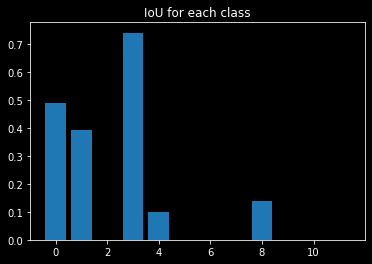

In [ ]:
#plot IOU
index = []
for i in range (len(res)):
    index.append(i)
    
plt.title("IoU for each class")
plt.bar(index, res)

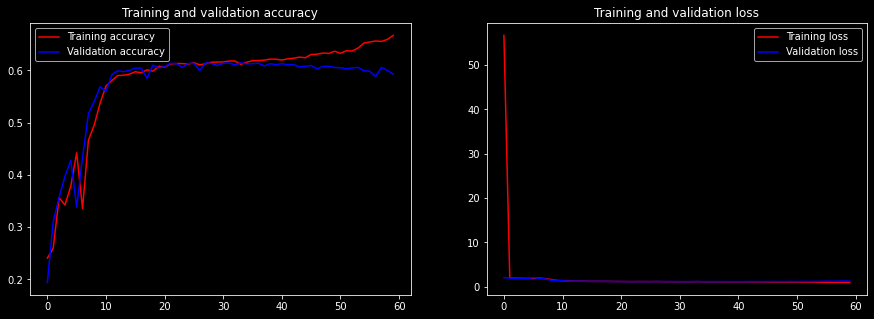

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend(loc=0)


ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend(loc=0)


plt.show()

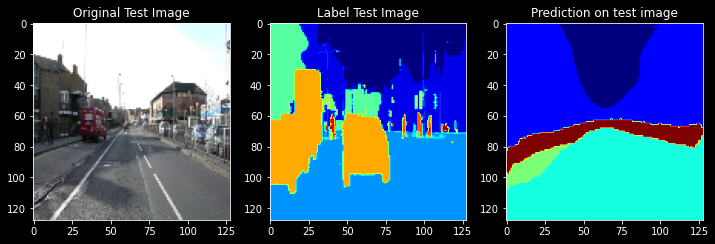

In [ ]:
#Plot Prediction Image

num = random.randint(0,len(x_test))
# num = 3

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.title('Original Test Image')
plt.imshow(x_test[num])

plt.subplot(232)
plt.title('Label Test Image')
plt.imshow(y_test[num].squeeze(), cmap ='jet')

plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(y_pred_argmax[num], cmap='jet')


plt.show()

---